## import libraries

In [22]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

## load data 

In [23]:
# Load The Dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## data preprocessing

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [27]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [28]:
encoder = LabelEncoder()
df['encoded_time'] = encoder.fit_transform(df['time'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [29]:
le = LabelEncoder()
df['encoded_gender'] = le.fit_transform(df['sex'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time,encoded_gender
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [30]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [31]:
ord_encoder = OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun']])
df['encoded_day'] = ord_encoder.fit_transform(df[['day']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time,encoded_gender,encoded_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,3.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,3.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,3.0


In [32]:
df['encoded_day'].value_counts()

encoded_day
2.0    87
3.0    76
0.0    62
1.0    19
Name: count, dtype: int64

In [33]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [34]:
le = LabelEncoder()
df['encoded_smoker'] = le.fit_transform(df['smoker'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time,encoded_gender,encoded_day,encoded_smoker
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,3.0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,3.0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,3.0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,3.0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,3.0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   total_bill      244 non-null    float64 
 1   tip             244 non-null    float64 
 2   sex             244 non-null    category
 3   smoker          244 non-null    category
 4   day             244 non-null    category
 5   time            244 non-null    category
 6   size            244 non-null    int64   
 7   encoded_time    244 non-null    int32   
 8   encoded_gender  244 non-null    int32   
 9   encoded_day     244 non-null    float64 
 10  encoded_smoker  244 non-null    int32   
dtypes: category(4), float64(3), int32(3), int64(1)
memory usage: 12.1 KB


In [36]:
df.drop('sex', axis=1, inplace=True)
df.drop('smoker', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df.drop('time', axis=1, inplace=True)

In [37]:
df.head()

,total_bill,tip,size,encoded_time,encoded_gender,encoded_day,encoded_smoker
0,16.99,1.01,2,0,0,3.0,0
1,10.34,1.66,3,0,1,3.0,0
2,21.01,3.50,3,0,1,3.0,0
3,23.68,3.31,2,0,1,3.0,0
4,24.59,3.61,4,0,0,3.0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_bill      244 non-null    float64
 1   tip             244 non-null    float64
 2   size            244 non-null    int64  
 3   encoded_time    244 non-null    int32  
 4   encoded_gender  244 non-null    int32  
 5   encoded_day     244 non-null    float64
 6   encoded_smoker  244 non-null    int32  
dtypes: float64(3), int32(3), int64(1)
memory usage: 10.6 KB


## train model

In [39]:
X = df.drop('encoded_gender', axis=1)
y = df['encoded_gender']

In [40]:
# split the data for train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# call the model
model = LogisticRegression()

In [42]:
# fit the model
model.fit(X_train, y_train)

LogisticRegression()

## test the model

In [43]:
y_pred = model.predict(X_test)  # predict the model


In [44]:

print('Prediction :', y_pred)
print('Actual :', y_test.values)
print('----------------------------------------')
print('Actual :', y_test)

Prediction : [1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 0]
Actual : [1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1
 0 0 1 1 0 1 0 1 0 0 1 1]
----------------------------------------
Actual : 24     1
6      1
153    1
211    1
198    0
176    1
192    1
124    0
9      1
101    0
45     1
233    1
117    0
177    1
82     0
146    0
200    1
15     1
66     0
142    1
33     0
19     1
109    0
30     1
186    0
120    1
10     1
73     0
159    1
156    1
112    1
218    1
25     1
60     1
18     0
119    0
97     1
197    0
139    0
241    1
75     1
127    0
113    1
16     0
196    1
67     0
168    0
38     1
195    1
Name: encoded_gender, dtype: int32


In [45]:
# evaluate the model
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.6938775510204082
Recall Score:  0.9
Precision Score:  0.6923076923076923
F1 Score:  0.782608695652174
Confusion Matrix: 
 [[ 7 12]
 [ 3 27]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.37      0.48        19
           1       0.69      0.90      0.78        30

    accuracy                           0.69        49
   macro avg       0.70      0.63      0.63        49
weighted avg       0.70      0.69      0.67        49



Text(95.72222222222221, 0.5, 'Actual')

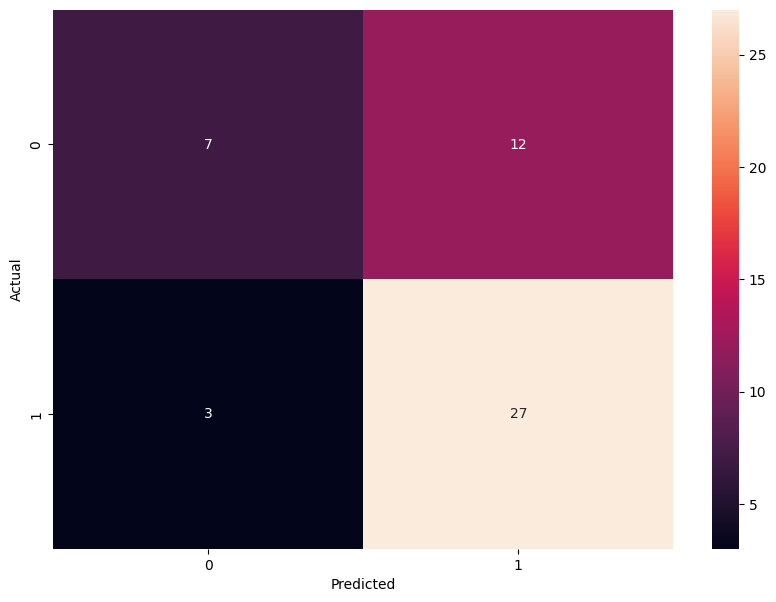

In [46]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [47]:
print('Prediction : ', model.predict([[16.99, 1.01, 2, 0, 3, 0]]))


Prediction :  [1]


c:\Users\fahad ali\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
